Adapted from 241028_midterm_figures

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/glade/u/home/jjeffree/ensemble-analogue-predictability/')
import predictability_tools as pt

In [2]:
plt.figure()
plt.rcParams['font.size'] = 24

<Figure size 640x480 with 0 Axes>

In [10]:
client.close()

2025-02-04 14:18:43,801 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing
2025-02-04 14:18:43,802 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing
2025-02-04 14:18:43,803 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing
2025-02-04 14:18:43,804 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing


In [3]:
from dask.distributed import Client
client = Client(threads_per_worker=1,memory_limit=0)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/jjeffree/another_node/proxy/8787/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/jjeffree/another_node/proxy/8787/status,Workers: 4
Total threads: 4,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42241,Workers: 4
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/jjeffree/another_node/proxy/8787/status,Total threads: 4
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:39449,Total threads: 1
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/jjeffree/another_node/proxy/34961/status,Memory: 0 B
Nanny: tcp://127.0.0.1:36759,


In [41]:
r=[]

for m in ('10P','10P30A','10P30I','10-30P','30-10P'):


    model_name = 'CESM2-LE'
    fct = xr.open_mfdataset('/glade/work/jjeffree/results/area_corr/multiindex/'+model_name+'_nomean_tos_zos/'+m+'_*.nc').sel(index_lon='nino34').load()
    assert fct.mask.shape == (1,)
    pattern_list=[]
    trim = 100
    pattern_list.append(xr.corr(fct.verification.isel(pred_SMILE_M=slice(0,trim)) ,
                                        fct.forecast.isel(pred_SMILE_M=slice(0,trim)),
                                        ('Y','pred_SMILE_M','lib_mi')
                                       ).load()
                               .assign_coords({'trim_SMILE_M':trim*100}))
    
    for trim in (1,2,4,10,20,40):
        for i in range(3):
            pattern_list.append(xr.corr(fct.verification.isel(pred_SMILE_M=slice(0+i*20,trim+i*20)) ,
                                        fct.forecast.isel(pred_SMILE_M=slice(0+i*20,trim+i*20)),
                                        ('Y','pred_SMILE_M','lib_mi')
                                       ).load()
                               .assign_coords({'trim_SMILE_M':trim*100}))
        
    for trim in (10,20,30,40,60,80):
        for smilem in (1,2,3,4,5):
            pattern_list.append(xr.corr(fct.verification.isel(pred_SMILE_M=slice(0,1),Y=slice(0,trim)) ,
                                        fct.forecast.isel(pred_SMILE_M=smilem,Y=slice(0,trim)),
                                        ('Y','pred_SMILE_M','lib_mi')
                                       ).load()
                               .assign_coords({'trim_SMILE_M':trim}))
        fct.close()
    r.append(xr.concat(pattern_list,'trim'))
    print(m)

r = xr.concat(r,'mask')

10P
10P30A
10P30I
10-30P
30-10P


In [42]:
r

<xarray.DataArray (trim: 49, mask: 5, init_month: 12, L: 37)> Size: 870kB
array([[[[ 9.93784114e-01,  9.71217400e-01,  9.29345337e-01, ...,
           1.05122073e-01,  1.03768914e-01,  1.02883160e-01],
         [ 9.89175489e-01,  9.65316397e-01,  9.22527380e-01, ...,
           1.25626895e-01,  1.22944835e-01,  1.14576601e-01],
         [ 9.86180328e-01,  9.61562486e-01,  9.07527842e-01, ...,
           1.43273778e-01,  1.34699989e-01,  1.15780495e-01],
         ...,
         [ 9.94195274e-01,  9.92212394e-01,  9.86118017e-01, ...,
           8.66294588e-02,  9.06011850e-02,  9.13292397e-02],
         [ 9.95165489e-01,  9.92171915e-01,  9.78858104e-01, ...,
           9.35021361e-02,  9.38737539e-02,  9.09833709e-02],
         [ 9.95569152e-01,  9.87144249e-01,  9.50715530e-01, ...,
           1.03353209e-01,  9.96206872e-02,  9.89514597e-02]],

        [[ 9.93639950e-01,  9.71115559e-01,  9.29540158e-01, ...,
           1.10336115e-01,  1.09569330e-01,  1.09280241e-01],
         [ 9.88777126e-01,  9.64980993e-01,  9.22869686e-01, ...,
           1.28406840e-01,  1.26121822e-01,  1.17903509e-01],
         [ 9.85727056e-01,  9.61373991e-01,  9.08043166e-01, ...,
           1.45333709e-01,  1.38398654e-01,  1.18768665e-01],
...
         [-5.32520501e-02, -5.92290991e-02, -6.60541638e-02, ...,
          -5.77380761e-03, -1.42330588e-02, -5.66916103e-03],
         [-6.88203957e-02, -7.55287092e-02, -8.40245051e-02, ...,
           9.49970092e-03,  1.85898725e-02,  1.53771124e-02],
         [-7.29382210e-02, -8.21329720e-02, -1.28126593e-01, ...,
           2.83675071e-02,  2.92608574e-02,  3.25361341e-02]],

        [[-5.14233441e-02, -9.81724538e-02, -9.59076214e-02, ...,
           2.53134959e-02,  2.75895283e-02,  2.81608730e-02],
         [-1.07112893e-01, -9.97632264e-02, -1.10556535e-01, ...,
           2.48864943e-02,  1.98825118e-02,  3.34203191e-02],
         [-9.89487638e-02, -1.15492855e-01, -1.36455256e-01, ...,
           2.31067111e-02,  2.62280645e-02,  3.64594256e-02],
         ...,
         [-5.17329454e-02, -5.86156837e-02, -6.61441400e-02, ...,
          -2.13512229e-02, -1.36097898e-02, -6.68310864e-03],
         [-6.69814235e-02, -7.48547518e-02, -8.30200712e-02, ...,
          -2.79249494e-02, -2.33619113e-02, -1.07773803e-02],
         [-6.85633442e-02, -7.73645915e-02, -1.19867871e-01, ...,
           1.37699596e-03,  3.96320899e-03,  1.16211889e-02]]]])
Coordinates:
  * mask          (mask) <U6 120B '10P' '10P30A' '10P30I' '10-30P' '30-10P'
    index_lon     <U6 24B 'nino34'
  * L             (L) int64 296B 0 1 2 3 4 5 6 7 8 ... 29 30 31 32 33 34 35 36
  * init_month    (init_month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    trim_SMILE_M  (trim) int64 392B 10000 100 100 100 200 200 ... 80 80 80 80 80
Dimensions without coordinates: trim

In [14]:
# oops = []
# for k in r.keys():
#     oops.append(r[k])
# r2 = xr.concat(oops,'mask')

In [27]:
err = xr.corr((r.sel(mask='10P30A')**2-r.sel(mask='10P')**2),(r.sel(mask='10P30A')**2-r.sel(mask='10P')**2).isel(trim=6),('L','init_month'))

In [26]:
r.trim_SMILE_M

<xarray.DataArray 'trim_SMILE_M' (trim: 19)> Size: 152B
array([  100,   200,   400,  1000,  2000,  4000, 10000,     5,    10,
          15,    20,    25,    30,    35,    40,    50,    60,    70,
          80])
Coordinates:
    index_lon     <U6 24B 'nino34'
    trim_SMILE_M  (trim) int64 152B 100 200 400 1000 2000 ... 40 50 60 70 80
Dimensions without coordinates: trim

10,000 = CESM2-LE, MPI-GE
1,000 $\approx$ the smallest ensemble we use


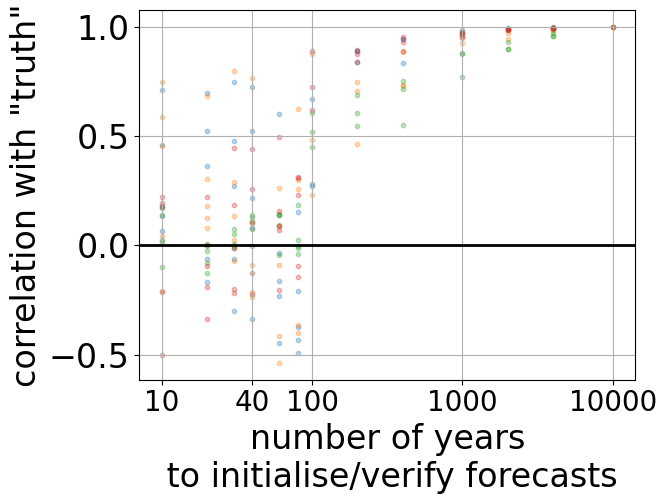

In [124]:
labels = ('Atlantic','Indian','N Pacific','S Pacific')
for i,m in enumerate(('10P30A','10P30I','10-30P','30-10P')):
    err = xr.corr((r.sel(mask=m)**2-r.sel(mask='10P')**2),(r.sel(mask=m)**2-r.sel(mask='10P')**2).isel(trim=0),('L','init_month'))

    plt.scatter(np.log10(r.trim_SMILE_M),err,10,alpha=0.3,label=labels[i])
    xlabel = np.array((10,40,100,1000,10000))
    plt.xticks(np.log10(xlabel),xlabel,size=20)
plt.grid()
plt.plot((0,5),(0,0),'k',linewidth=2)
plt.xlim((0.85,4.15))
plt.xlabel('number of years\n to initialise/verify forecasts')
plt.ylabel('correlation with "truth"')

print('10,000 = CESM2-LE, MPI-GE')
print('1,000 $\\approx$ the smallest ensemble we use')
plt.savefig('figures/fewer_forecasts_scatter.pdf',bbox_inches='tight',pad_inches=0.2)

In [65]:
def incremental_sailboat2(skill,
                    N = 40*90*7,
                    start_mask = ('30P','30P','30P'),
                    later_mask=('30P30A','30P30I','60P'),
                    skill_type='corr',
                    vlim=(-0.075,0.075),
             fig = None,
             axs = None,
             cb_axs=None,

    ):
    assert not(0 in skill.init_month), 'Month should have coordinates'
    if skill_type=='corr':
        diff_func = lambda x,y: y**2-x**2
        cmap = 'BrBG'
        def stat_sig(r,r1):
            S = np.sqrt(1/(N-3))

            z = (np.arctanh(r1)-np.arctanh(r))/S
            
            # stat_sig = xr.ones_like(z).where(np.abs(z)>1.96)
            # if np.any(~np.isnan(stat_sig)) and np.any(np.isnan(stat_sig)):
            #     pt.plot.add_iso_line(plt.gca(), stat_sig.roll(init_month=-4).T, 0.01,x_shift = 5, y_shift = 0,linekwargs={'colors':'grey','lw':0.8,'linestyle':'dotted'}) #I think xshift is 1st month???

            stat_sig = xr.ones_like(z).where(np.abs(z)>2.58)
            if np.any(~np.isnan(stat_sig)) and np.any(np.isnan(stat_sig)):
                pt.plot.add_iso_line(plt.gca(), stat_sig.roll(init_month=-4).T, 0.01,x_shift = 5, y_shift = 0,linekwargs={'colors':'grey','lw':1,}) #I think xshift is 1st month???
        clabel0 = 'r'
        clabel = r'$\Delta$r$^2$'

    elif skill_type=='mse':
        diff_func = lambda x,y: ((y-x)/x)*100
        cmap = 'BrBG_r'

        def stat_sig(r,r1):
                F = r1/r

                p_good = scipy.stats.f.cdf(r1/r,N-2,N-2)
                p_bad = scipy.stats.f.cdf(r/r1,N-2,N-2)
                p = np.min((p_good,p_bad),axis=0)
                
                stat_sig = xr.ones_like(F).where(p<0.01)
                if np.any(~np.isnan(stat_sig)) and np.any(np.isnan(stat_sig)):
                    pt.plot.add_iso_line(plt.gca(), stat_sig.roll(init_month=-4).T, 0.01,x_shift = 5, y_shift = 0,linekwargs={'colors':'grey','lw':0.8,})#'linestyle':'dotted' #I think xshift is 1st month???

        clabel0 = 'MSE'
        clabel = '% MSE change'
    elif skill_type=='first_only':
        diff_func = lambda x,y: x**2
        cmap = 'BuGn'

        def stat_sig(r,r1):
            return None
        clabel0 = 'r'
        clabel = r'$\Delta$r$^2$'
    else:
        assert False, 'need a skill type'

    if fig is None:
        assert axs is None, 'Either pass both axs and fig or neither'
        fig, axs = plt.subplots(1,len(later_mask)+1,figsize=((len(later_mask)+1)*4,8),
                               sharex=True,sharey=True)
    elif axs is None:
        assert False, 'Either pass both axs and fig or neither'
        
    # if cb_axs is None:
    #     cb_axs=axs

    assert len(later_mask) == len(start_mask), 'later and start mask must be paired'
    for ax_i in range(len(later_mask)):
        plt.sca(axs)

        r = skill.sel(mask=start_mask[ax_i])
        r1 = skill.sel(mask=later_mask[ax_i])

        scatter = plt.pcolormesh(((r.init_month+r.L*0-5)%12+5).roll(init_month=-4),
            (r.init_month*0+r.L).roll(init_month=-4),
            diff_func(r,r1).roll(init_month=-4),
            cmap=cmap,
                                 #marker='s',s=100,
                                 vmin=vlim[0],vmax=vlim[1])
        stat_sig(r,r1)

        #plt.xticks((13,7,),('Jan','Jul',),size=32)
        #plt.title(start_mask[ax_i]+' -> '+later_mask[ax_i])
        
        axs.yaxis.set_tick_params(size=30,width=2,color='grey')
        axs.xaxis.set_tick_params(size=15,width=2,color='grey')

    if not(cb_axs is None):
        cbar = fig.colorbar(scatter, 
                            ax=cb_axs,
                            orientation='horizontal', 
                            fraction=1,
                             extend='both',
                            pad=0.1,
                            aspect=45*len(later_mask),
                           )
        cbar.ax.tick_params(labelsize=20)
        cbar.set_label(clabel, fontsize=20)

    return axs

In [101]:
r.trim_SMILE_M

<xarray.DataArray 'trim_SMILE_M' (trim: 49)> Size: 392B
array([10000,   100,   100,   100,   200,   200,   200,   400,   400,
         400,  1000,  1000,  1000,  2000,  2000,  2000,  4000,  4000,
        4000,    10,    10,    10,    10,    10,    20,    20,    20,
          20,    20,    30,    30,    30,    30,    30,    40,    40,
          40,    40,    40,    60,    60,    60,    60,    60,    80,
          80,    80,    80,    80])
Coordinates:
    index_lon     <U6 24B 'nino34'
    trim_SMILE_M  (trim) int64 392B 10000 100 100 100 200 200 ... 80 80 80 80 80
Dimensions without coordinates: trim

In [114]:
m='10P30A'
xr.corr((r.sel(mask=m)**2-r.sel(mask='10P')**2),(r.sel(mask=m)**2-r.sel(mask='10P')**2).isel(trim=0),('L','init_month'))[-12]

<xarray.DataArray ()> Size: 8B
array(0.21843557)
Coordinates:
    index_lon  <U6 24B 'nino34'

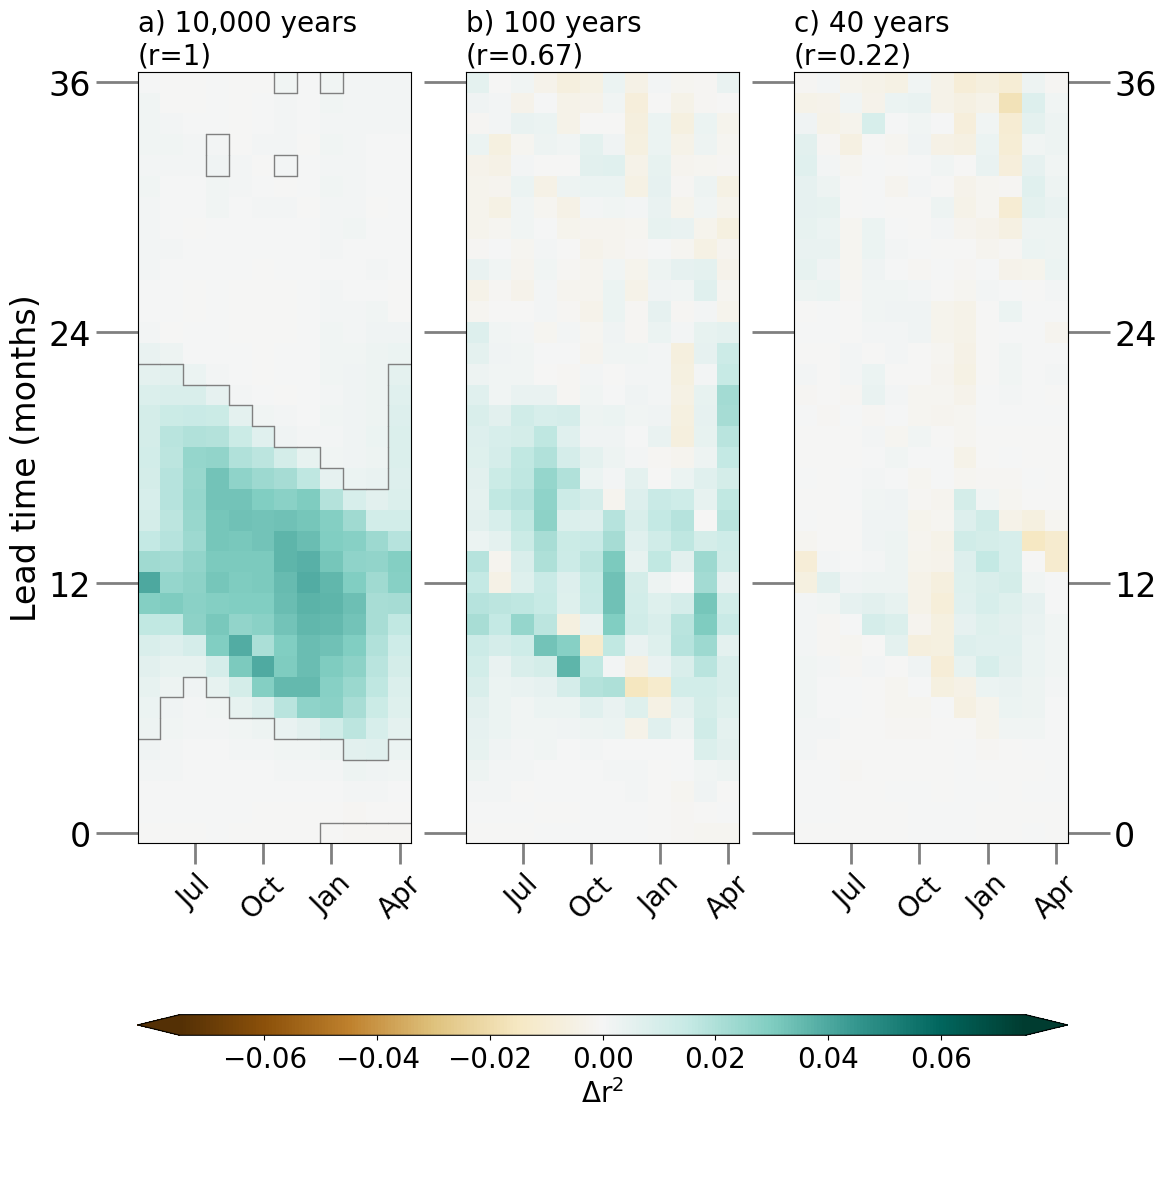

In [123]:
fig, axs = plt.subplots(2,3,figsize=(3*4,8.2*1*2.2*0.8),sharey=True,gridspec_kw={'height_ratios':[1,0.2]})
incremental_sailboat2(r.isel(trim=0),
                    N = 100*90*19,
                    start_mask = ('10P',),
                    later_mask=('10P30A',),
                      fig=fig,
                      axs=axs[0,0])

incremental_sailboat2(r.isel(trim=1),
                    N = 90*19,
                    start_mask = ('10P',),
                    later_mask=('10P30A',),
                      fig=fig,
                      axs=axs[0,1])
incremental_sailboat2(r.isel(trim=-12),
                    N = 40*19,
                    start_mask = ('10P',),
                    later_mask=('10P30A',),
                      fig=fig,
                      axs=axs[0,2],cb_axs=axs[1])
plt.subplots_adjust(hspace=0.4)
for mi in range(3):
    axs[0,mi].set_xticks([7,10,13,16],['Jul','Oct','Jan','Apr'],size=20,rotation=45)
[axs[1,i].axis('off') for i in range(3)]
axs[0,0].set_ylabel('Lead time (months)')
axs[0,0].set_yticks([0,12,24,36],[0,12,24,36],)#fontsize=20)
axs[0,-1].tick_params(right=True,labelright=True)
axs[0,-1].set_yticks([0,12,24,36],[0,12,24,36],)#fontsize=20)

axs[0,0].set_title('a) 10,000 years\n(r=1)',loc='left',size=20)
axs[0,1].set_title('b) 100 years\n(r=0.67)',loc= 'left',size=20)
axs[0,2].set_title('c) 40 years\n(r=0.22)',loc='left',size=20)
plt.savefig('figures/fewer_forecasts_sailboat.pdf',bbox_inches='tight',pad_inches=0.2)

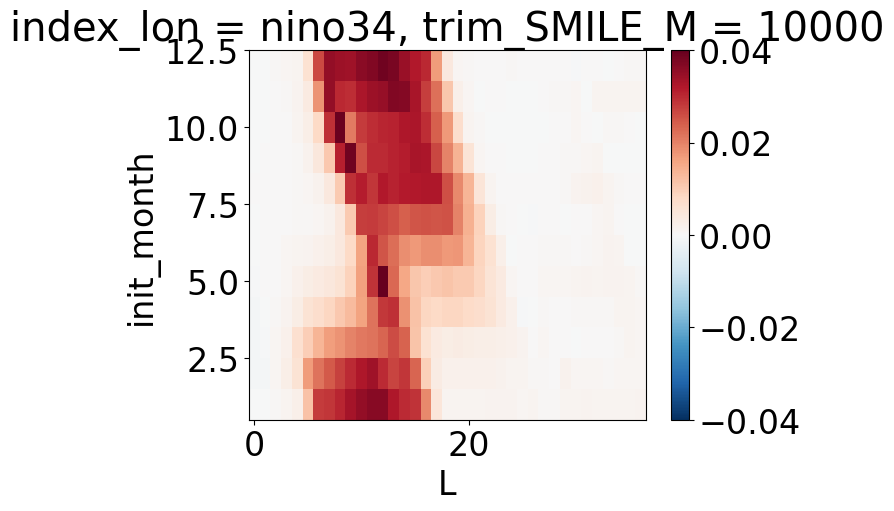

In [64]:
((r.sel(mask='10P30A')**2-r.sel(mask='10P')**2).isel(trim=0)).plot()

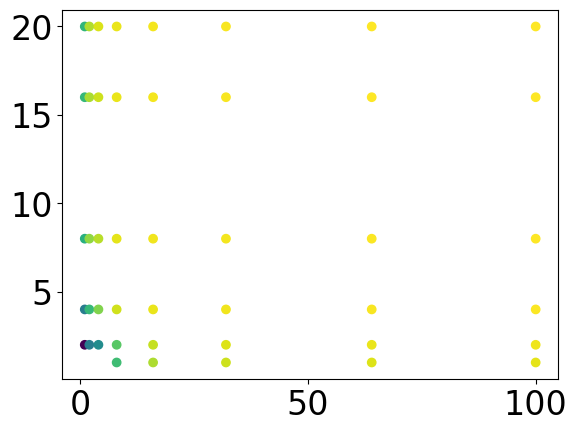

In [29]:
plt.scatter(r2.trim_SMILE_M*5,r2.trim_lib_mi,c=err)

In [33]:
r2.trim_SMILE_M

<xarray.DataArray 'trim_SMILE_M' (trim: 48)> Size: 384B
array([  1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   4,
         4,   4,   4,   4,   4,   8,   8,   8,   8,   8,   8,  16,  16,
        16,  16,  16,  16,  32,  32,  32,  32,  32,  32,  64,  64,  64,
        64,  64,  64, 100, 100, 100, 100, 100, 100])
Coordinates:
    index_lon     <U6 24B 'nino34'
    trim_SMILE_M  (trim) int64 384B 1 1 1 1 1 1 2 ... 64 100 100 100 100 100 100
    trim_lib_mi   (trim) int64 384B 1 2 4 8 16 20 1 2 4 ... 16 20 1 2 4 8 16 20
Dimensions without coordinates: trim

In [35]:
r2.trim_SMILE_M[5]*r2.trim_lib_mi[5]

<xarray.DataArray ()> Size: 8B
array(20)
Coordinates:
    index_lon     <U6 24B 'nino34'
    trim_SMILE_M  int64 8B 1
    trim_lib_mi   int64 8B 20

In [39]:
r2.trim_SMILE_M[5]*r2.trim_lib_mi[5],err[5]

(<xarray.DataArray ()> Size: 8B
 array(20)
 Coordinates:
     index_lon     <U6 24B 'nino34'
     trim_SMILE_M  int64 8B 1
     trim_lib_mi   int64 8B 20,
 <xarray.DataArray ()> Size: 8B
 array(0.6704313)
 Coordinates:
     index_lon  <U6 24B 'nino34')

Text(<xarray.DataArray ()> Size: 8B
array(3.24573227)
Coordinates:
    index_lon     <U6 24B 'nino34'
    trim_SMILE_M  int64 8B 1
    trim_lib_mi   int64 8B 20, <xarray.DataArray ()> Size: 8B
array(0.1704313)
Coordinates:
    index_lon  <U6 24B 'nino34', '100 years of \nobservational data')

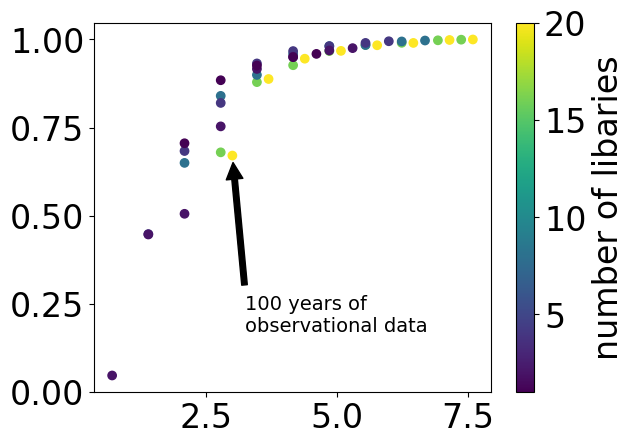

In [46]:
plt.scatter(np.log(r2.trim_SMILE_M*r2.trim_lib_mi),err,c=r2.trim_lib_mi)
plt.colorbar(label='number of libaries')
plt.annotate('100 years of \nobservational data',(np.log(r2.trim_SMILE_M[5]*r2.trim_lib_mi[5]),err[5]),(np.log(r2.trim_SMILE_M[5]*r2.trim_lib_mi[5])+0.25,err[5]-0.5),size=14,arrowprops=dict(facecolor='black', shrink=0.05))

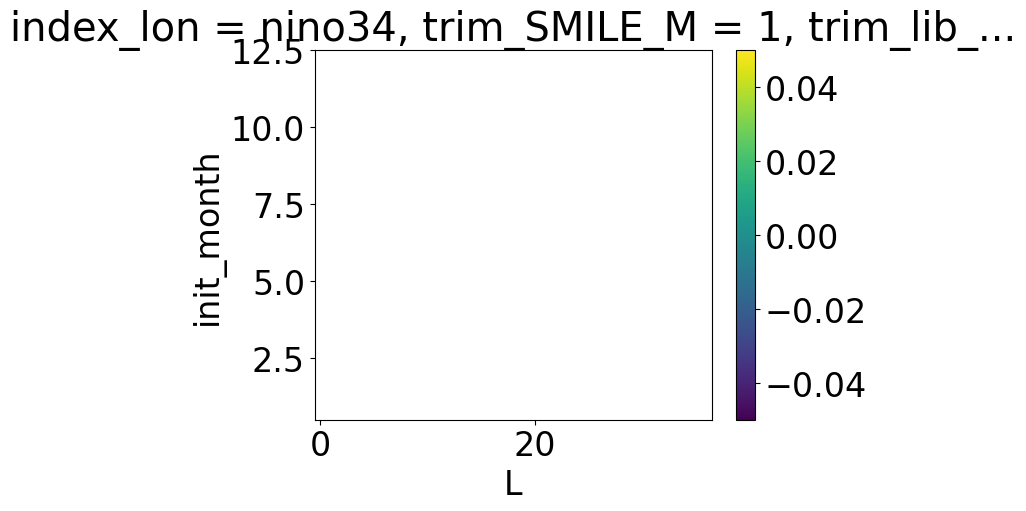

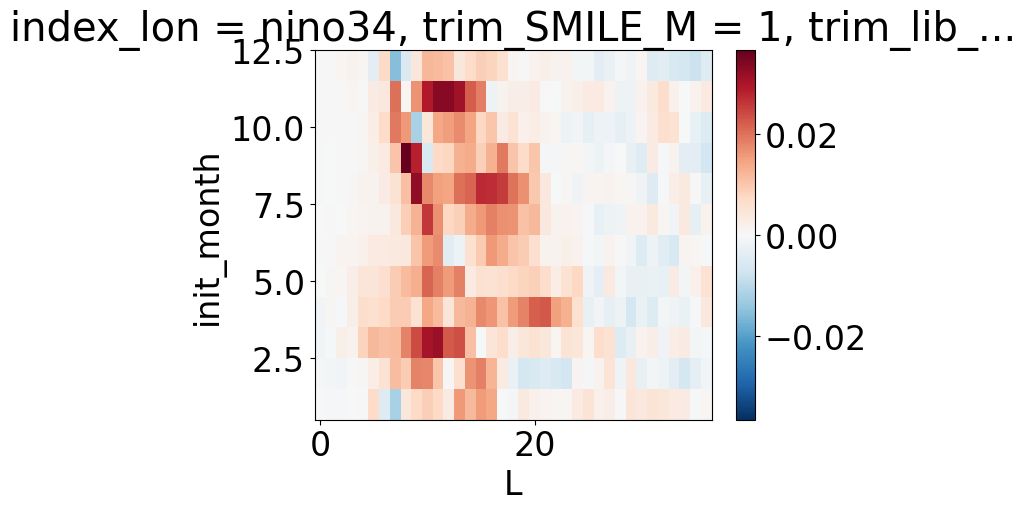

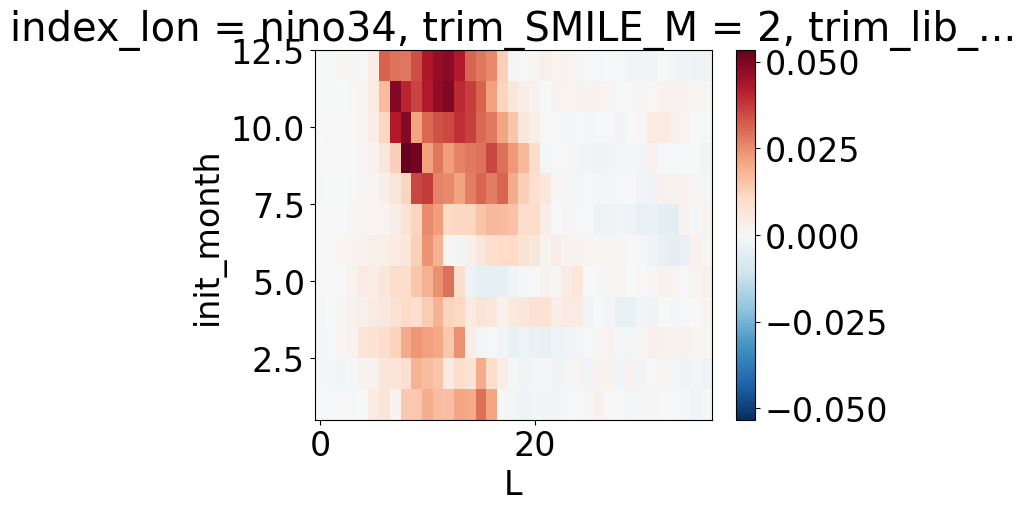

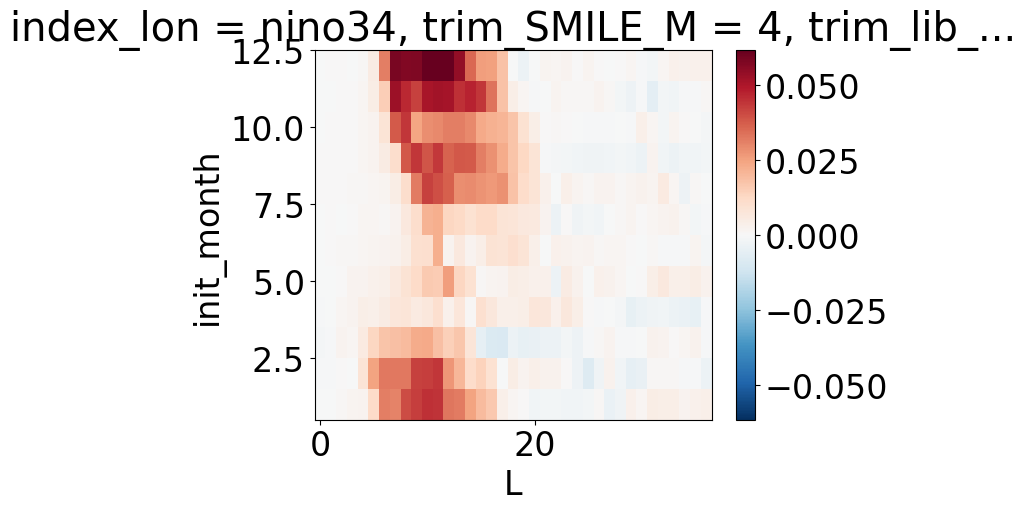

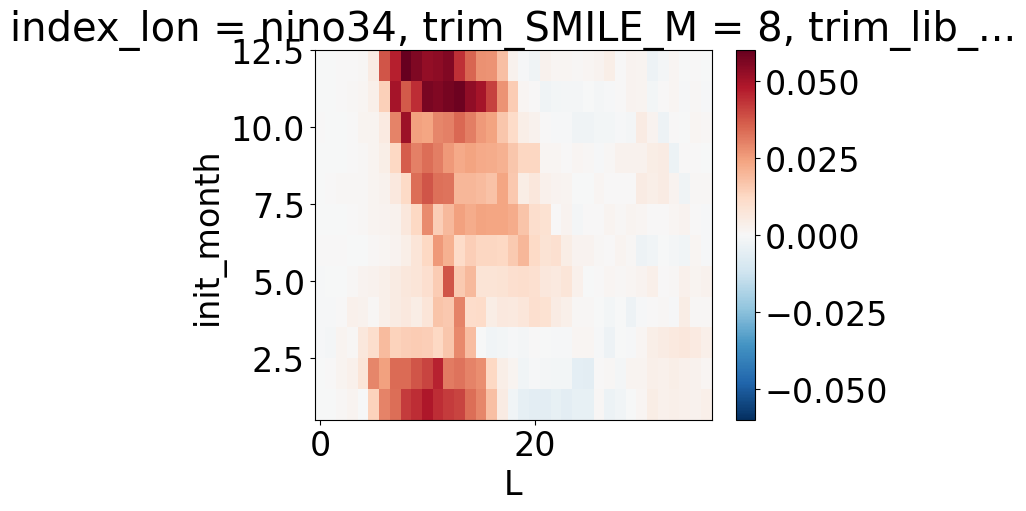

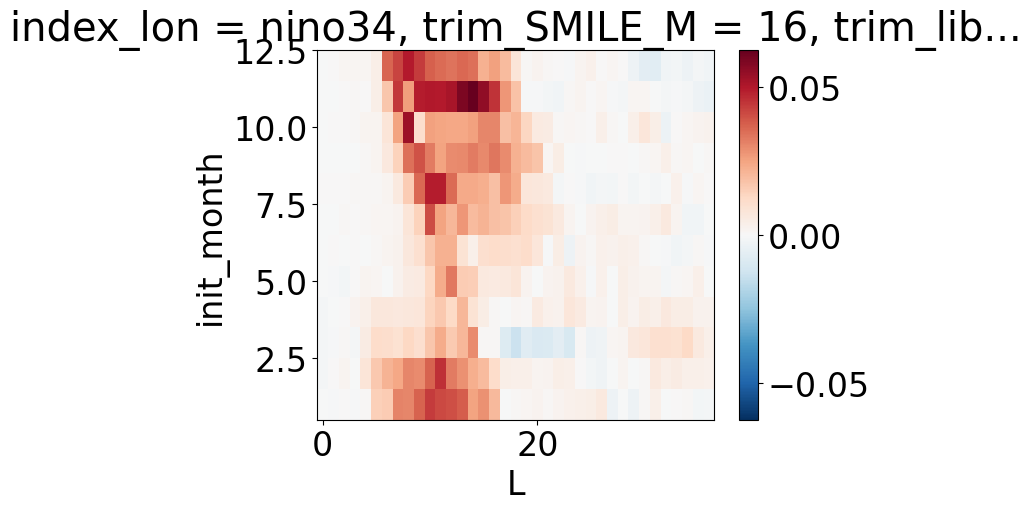

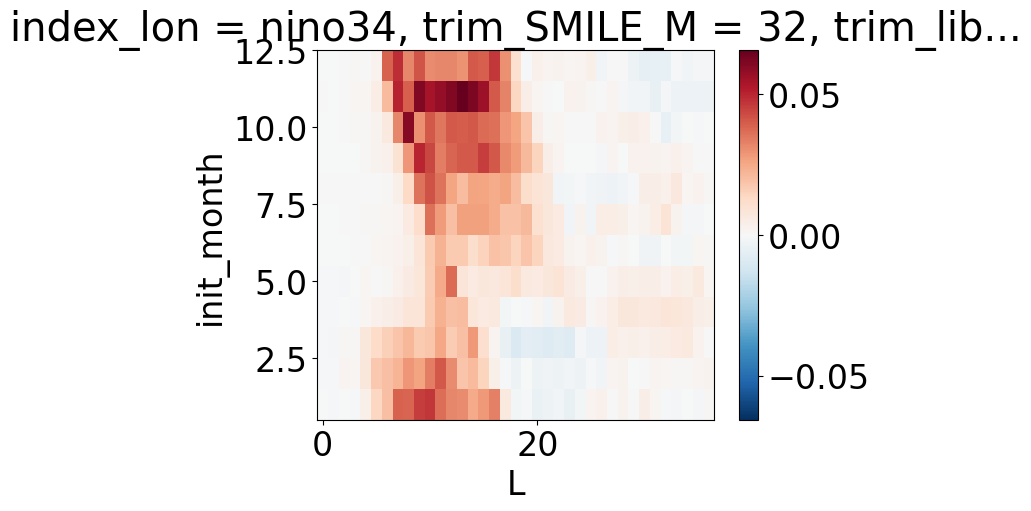

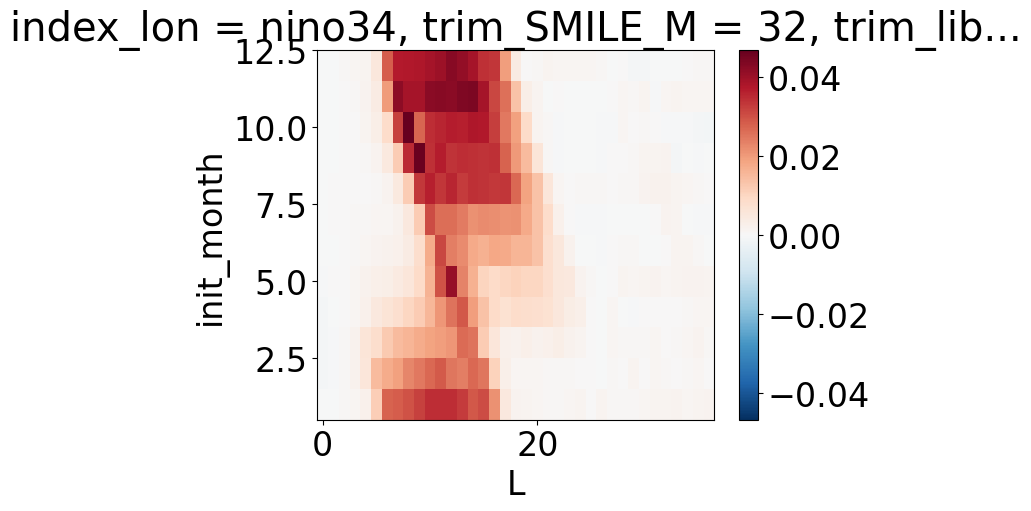

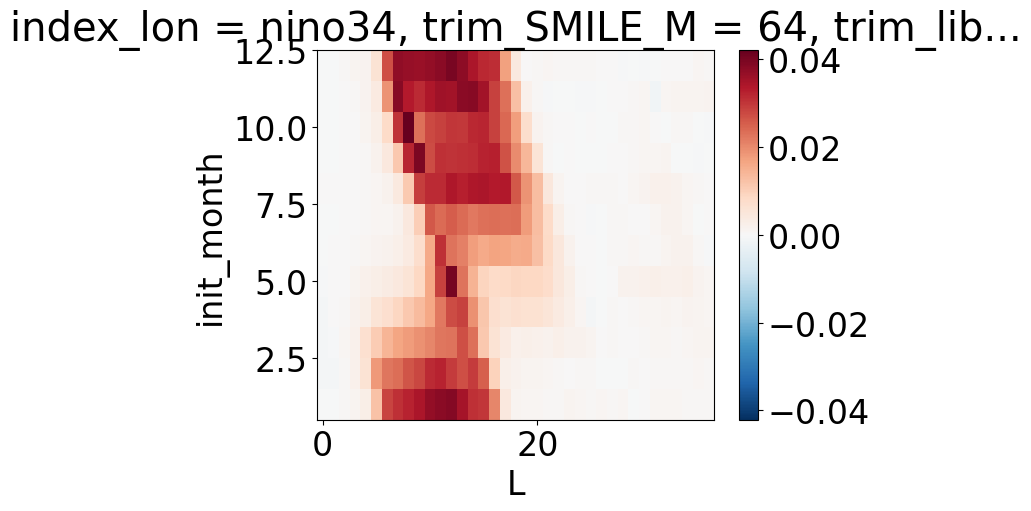

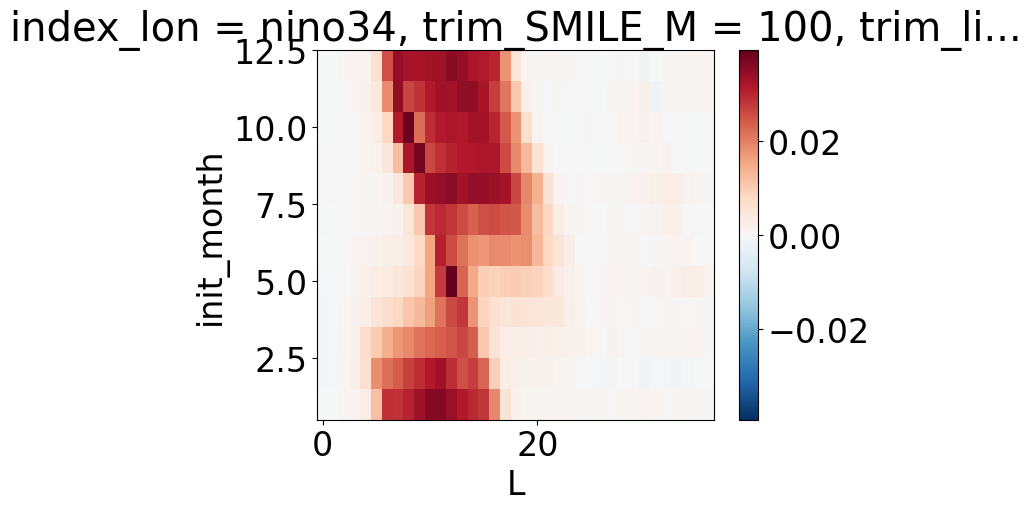

In [17]:
for i in range(0,48,5):
    plt.figure()
    (r2.sel(mask='10P30A')**2-r2.sel(mask='10P')**2).isel(trim=i).plot()